### Dataset Sources

Beat Acute Myeloid Leukemia (AML) 1.0 was accessed on 13Mar2023 from https://registry.opendata.aws/beataml. OHSU BeatAML Datasets Link: https://ctd2-data.nci.nih.gov/Public/OHSU-1/BeatAML_Waves1_2/

OpenCell Datasets Link: https://opencell.czbiohub.org/download

### Dataset S3 Location

Importing Raw Datasets from AWS S3. Use the AWS Command Line Interface (CLI) to list the S3 bucket content using the following CLI commands:

In [2]:
!aws s3 ls s3://team4rawdatasets/CSV/Input/OHSU_BeatAML_ClinicalSummary/

2023-03-21 02:37:21          0 
2023-03-21 02:38:06     712633 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [3]:
!aws s3 ls s3://team4rawdatasets/CSV/Input/OpenCell_ProteinInteraction/

2023-03-21 02:37:38          0 
2023-03-21 02:38:40    4568928 opencell-protein-interactions.csv


### Check Pre-Requisites from the `01_setup/` Folder

In [4]:
%store -r setup_instance_check_passed

In [5]:
try:
    setup_instance_check_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++")

In [6]:
print(setup_instance_check_passed)

True


In [7]:
%store -r setup_dependencies_passed

In [8]:
try:
    setup_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

In [9]:
print(setup_dependencies_passed)

True


In [10]:
%store -r setup_s3_bucket_passed

In [11]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [12]:
print(setup_s3_bucket_passed)

True


In [13]:
%store -r setup_iam_roles_passed

In [14]:
try:
    setup_iam_roles_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++")

In [15]:
print(setup_iam_roles_passed)

True


In [16]:
if not setup_instance_check_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_dependencies_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_s3_bucket_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_iam_roles_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [17]:
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

### Set S3 Source Location

In [18]:
s3_public_path_clsm = "s3://team4rawdatasets/CSV/Input/OHSU_BeatAML_ClinicalSummary/"

In [19]:
%store s3_public_path_clsm

Stored 's3_public_path_clsm' (str)


In [20]:
print(s3_public_path_clsm)

s3://team4rawdatasets/CSV/Input/OHSU_BeatAML_ClinicalSummary/


In [21]:
!aws s3 ls $s3_public_path_clsm

2023-03-21 02:37:21          0 
2023-03-21 02:38:06     712633 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [22]:
s3_private_path_clsm = "s3://team4rawdatasets/CSV/Output/"
print(s3_private_path_clsm)

s3://team4rawdatasets/CSV/Output/


In [23]:
%store s3_private_path_clsm

Stored 's3_private_path_clsm' (str)


In [24]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/team4rawdatasets?prefix=CSV/Input/OHSU_BeatAML_ClinicalSummary/&region=us-east-1">S3 Bucket</a></b>'.format(
            region, account_id, region
        )
    )
)

### Athena

[PyAthena](https://pypi.org/project/PyAthena/) is a Python DB API 2.0 (PEP 249) compliant client for Amazon Athena.

In [25]:
!pip install --disable-pip-version-check -q PyAthena==2.1.0
from pyathena import connect

In [26]:
%store -r ingest_create_athena_db_passed

In [27]:
try:
    ingest_create_athena_db_passed
except NameError:
    print("++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL PREVIOUS NOTEBOOKS.  You did not convert into Parquet data.")
    print("++++++++++++++++++++++++++++++++++++++++++++++")

In [28]:
print(ingest_create_athena_db_passed)

True


In [29]:
if not ingest_create_athena_db_passed:
    print("++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL PREVIOUS NOTEBOOKS.  You did not convert into Parquet data.")
    print("++++++++++++++++++++++++++++++++++++++++++++++")
else:
    print("[OK]")

[OK]


### Athena Sample Query

In [30]:
import pandas as pd

In [31]:
# Set Athena database & table
database_name = "bcr"
table_clsm = "ohsu_beataml_clinicalsummary"
table_pi = "opencell_proteininteraction"

In [32]:
#Athena SQL Code
statement1 = """
SELECT *
FROM {}.{} 
""".format(
    database_name, table_pi
)

print(statement1)


SELECT *
FROM bcr.opencell_proteininteraction 



In [33]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [34]:
# Connection to Athena
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [35]:
pi = pd.read_sql(statement1, conn)
pi.head(5)

,target_gene_name,interactor_gene_name,target_ensg_id,interactor_ensg_id,interactor_uniprot_ids,pval,enrichment,interaction_stoichiometry,abundance_stoichiometry
0,AAMP,ARGLU1,ENSG00000127837,ENSG00000134884,Q9NWB6;Q9NWB6-3;Q9NWB6-2,5.495914,2.868131,0.128617729227485,0.222926886757708
1,AAMP,CWF19L2,ENSG00000127837,ENSG00000152404,Q2TBE0;Q2TBE0-2;H7C3G7;Q2TBE0-3;H0YE03,5.480125,2.889502,0.0220086333382949,0.0630363097469908
2,AAMP,PRPF40A,ENSG00000127837,ENSG00000196504,A0A3F2YNY6;O75400-2;O75400-3;O75400;H0YG38;F5H578,5.321102,3.228531,0.00158221475294645,0.74201685528861
3,AAMP,RPL10,ENSG00000127837,ENSG00000147403,X1WI28;P27635;B8A6G2;A6QRI9;Q96L21,15.156173,4.847218,0.521148076897205,13.1469097118672
4,AAMP,RSRC1,ENSG00000127837,ENSG00000174891,Q96IZ7-2;Q96IZ7;H7C5Q0;C9J713;C9J367;C9J8Q2;C9...,5.929453,3.239392,0.0131705143900265,0.210925681027771


In [38]:
if not pi.empty:
    print("[OK]")
else:
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOUR DATA HAS NOT BEEN CONVERTED TO PARQUET. LOOK IN PREVIOUS CELLS TO FIND THE ISSUE.")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")

[OK]


### AWS Glue Catalog

In [39]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="top" href="https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables">AWS Glue Catalog</a></b>'.format(
            region
        )
    )
)

# Visualization

### Import Tools: 

In [43]:
!pip install klib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 3.5 MB/s eta 0:00:0000:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import klib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

### OHSU BeatAML Clinical Summary Table

In [41]:
# SQL statement
statement2 = """
SELECT *
FROM {}.{} 
""".format(
    database_name, table_clsm
)

print(statement2)


SELECT *
FROM bcr.ohsu_beataml_clinicalsummary 



In [42]:
clsm = pd.read_sql(statement2, conn)
clsm.head(5)

,labid,patientid,consensus_sex,inferred_sex,inferred_ethnicity,centerid,cebpa_biallelic,ageatdiagnosis,isrelapse,isdenovo,...,stag2,stat3,suz12,tcl1a,tet2,tp53,tyk2,u2af1,wt1,zrsr2
0,17-00033,4359,Male,Male,White,3,n,74.0,False,False,...,,,,,,,,,,
1,17-00059,2694,Male,Male,Black,6,n,50.0,False,False,...,,,,,,,,,,
2,17-00064,4363,Male,Male,HispNative,5,n,55.0,False,True,...,,,,,c.284_307del; p.P95_R102del; MAF 45%,,,,,
3,17-00072,4366,Male,Male,White,1,n,70.0,False,False,...,,negative,,,,,p.P95H; MAF 40%,,,
4,17-00077,4317,Female,Female,White,1,n,72.0,False,False,...,,,negative,,,,,,,


### clsm Missing Values

GridSpec(6, 6)

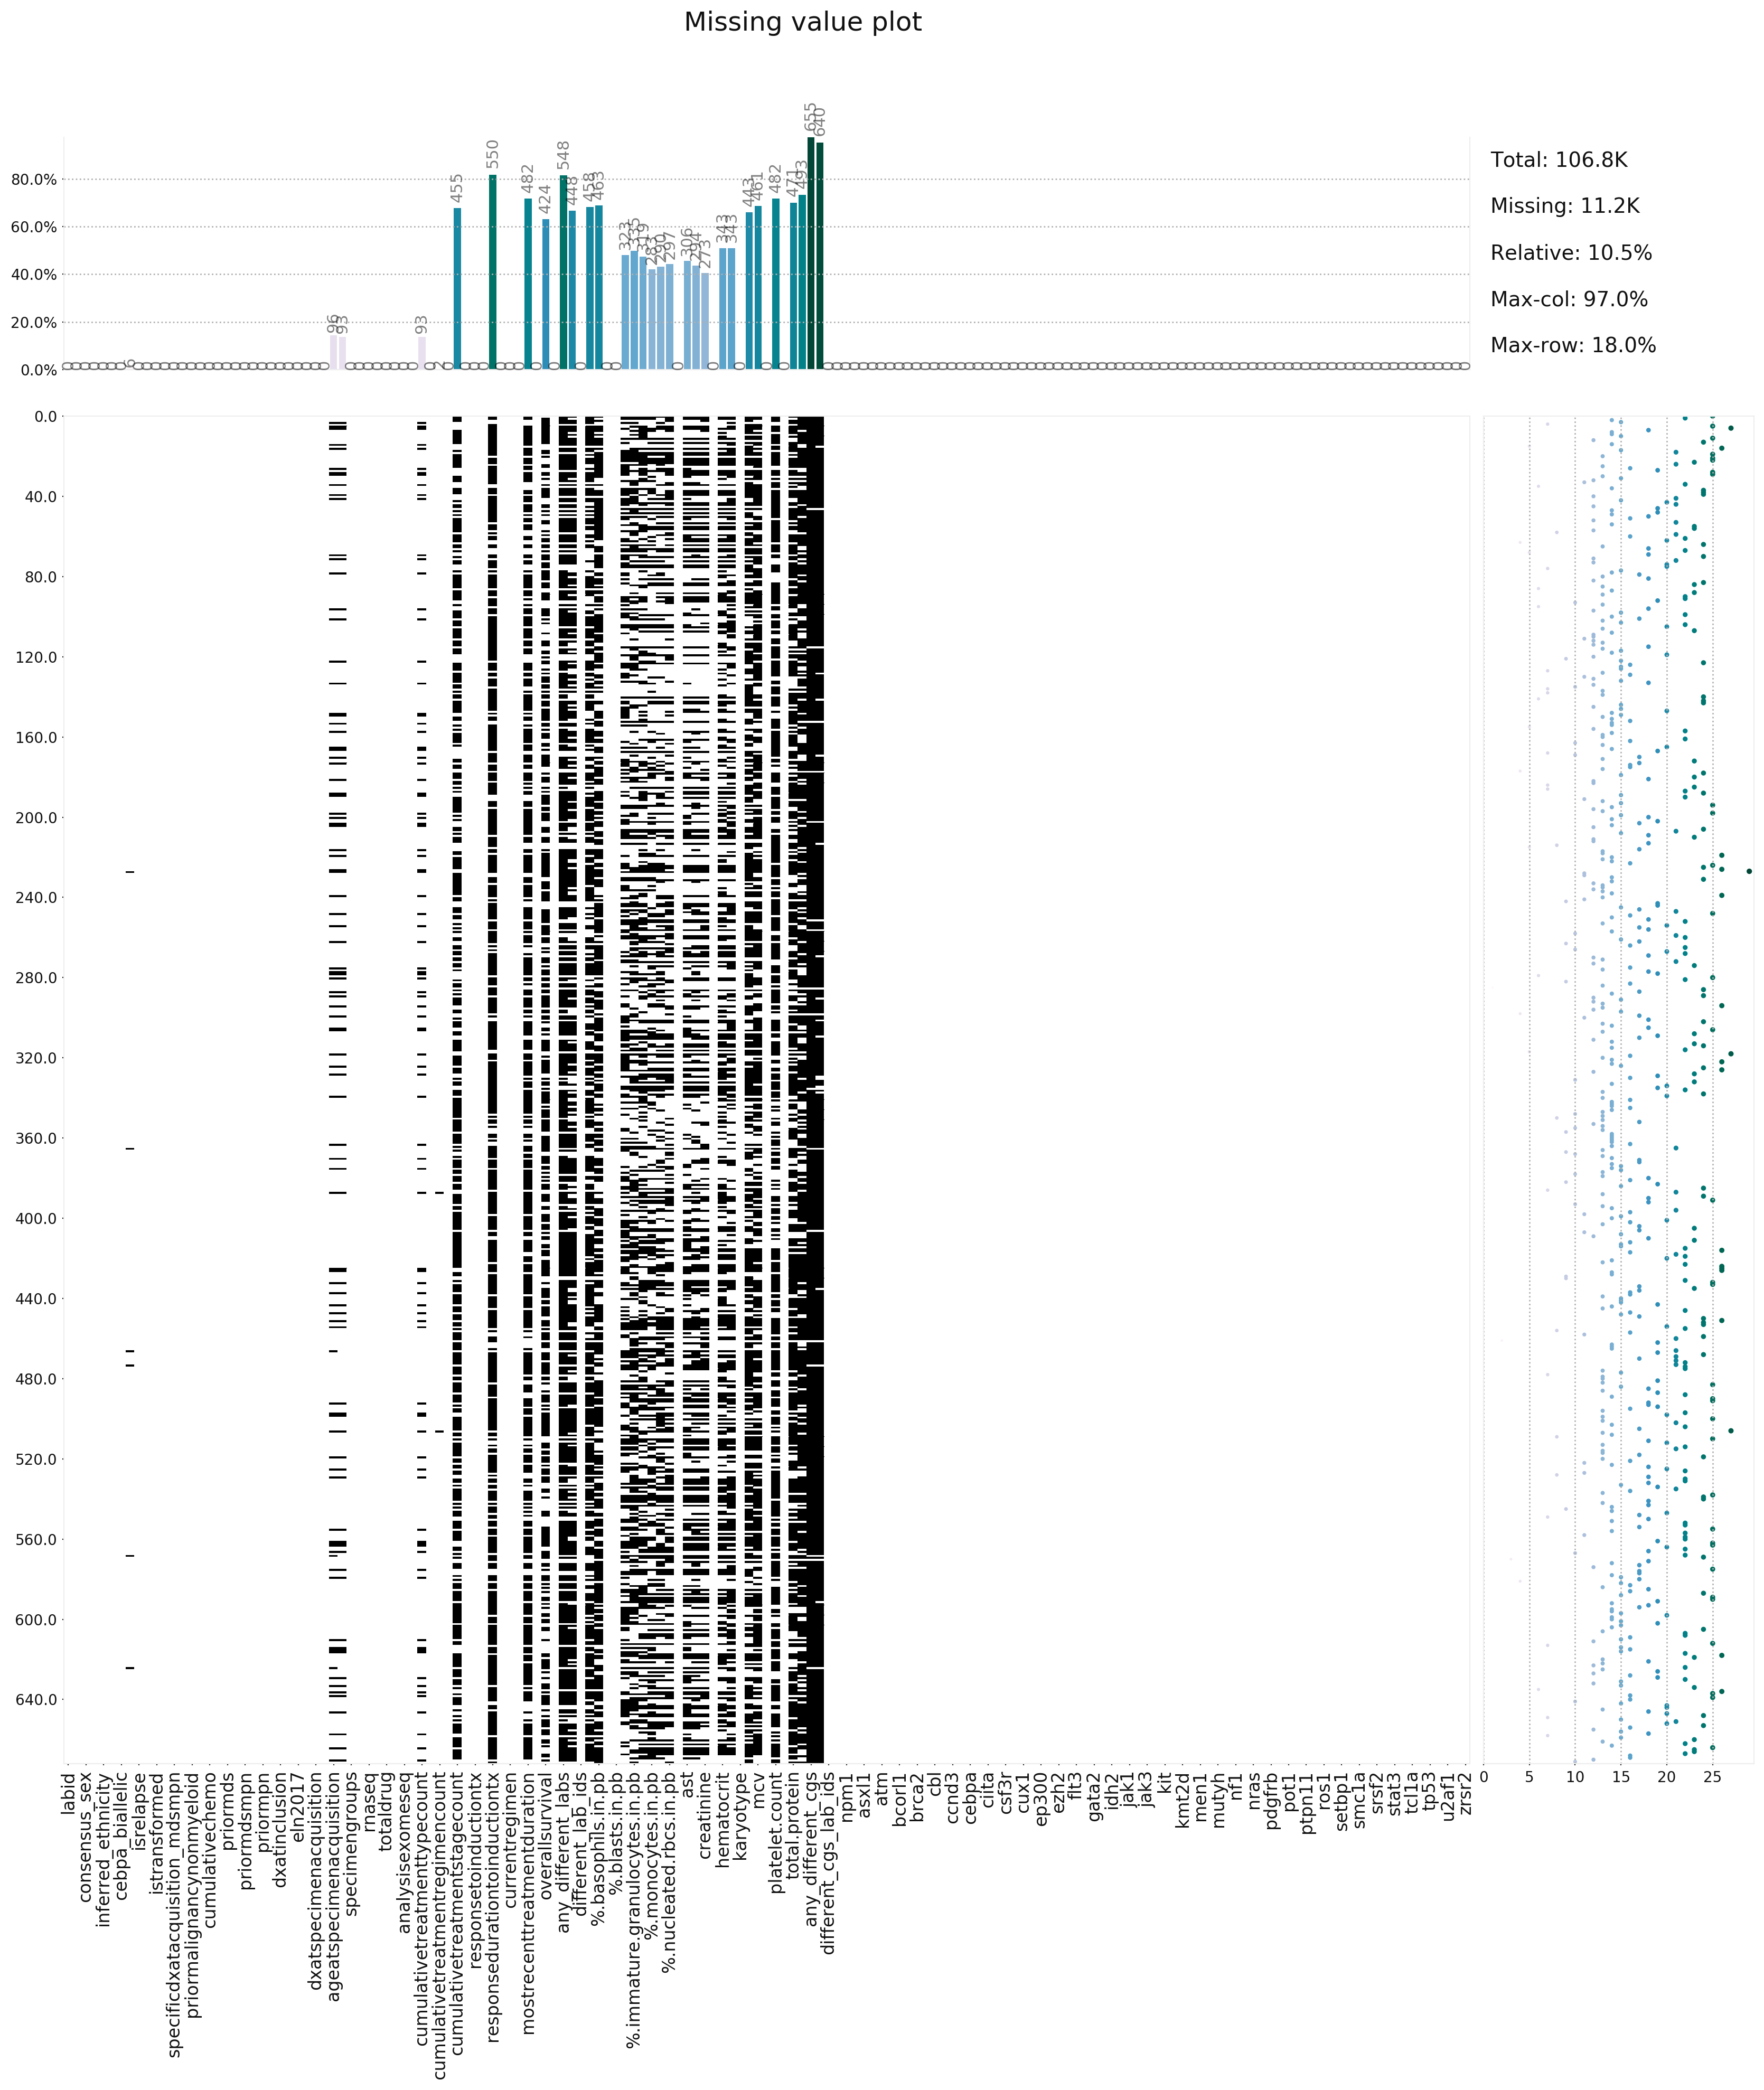

In [46]:
klib.missingval_plot(clsm)

### clsm Index

# Release Resources

In [28]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}